In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
train_df = pd.read_excel("Data_Train.xlsx")
test_df = pd.read_excel("Test_set.xlsx")

In [4]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [6]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [10]:
big_df = train_df.append(test_df, sort=False)

In [11]:
big_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [12]:
big_df.shape

(13354, 11)

In [13]:
train_df.shape

(10683, 11)

In [14]:
big_df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [15]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

## Feature Engineering

In [23]:
big_df["Date"] = big_df["Date_of_Journey"].str.split("/").str[0]
big_df["Date"]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date, Length: 13354, dtype: object

In [24]:
big_df["Date_of_Journey"].str.split("/").str[1]

0       03
1       05
2       06
3       05
4       03
        ..
2666    06
2667    03
2668    03
2669    03
2670    06
Name: Date_of_Journey, Length: 13354, dtype: object

In [26]:
big_df["Month"] = big_df["Date_of_Journey"].str.split("/").str[1]
big_df["Year"] = big_df["Date_of_Journey"].str.split("/").str[2]

In [27]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [30]:
big_df["Date"] = big_df["Date"].astype("int")
big_df["Month"] = big_df["Month"].astype("int")
big_df["Year"] = big_df["Year"].astype("int")

In [32]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [36]:
big_df.drop(["Date_of_Journey"], axis=1, inplace=True)

In [37]:
big_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month',
       'Year'],
      dtype='object')

In [39]:
big_df["Arrival_Time"] = big_df["Arrival_Time"].str.split(" ").str[0]

In [40]:
big_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,1 stop,No info,NaN,6,6,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,1 stop,No info,NaN,6,3,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


In [41]:
big_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [42]:
big_df["Total_Stops"].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [48]:
big_df["Total_Stops"].isna().sum()

0

In [47]:
big_df["Total_Stops"].fillna("2 stops", inplace=True)

In [56]:
big_df["Total_Stops"][big_df["Total_Stops"]=="0-stop"] = "0 stop"

<ipython-input-56-9d6c8e210a6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df["Total_Stops"][big_df["Total_Stops"]=="0-stop"] = "0 stop"


In [57]:
big_df["Total_Stops"].value_counts()

1 stop     7056
0 stop     4340
2 stops    1900
3 stops      56
4 stops       2
Name: Total_Stops, dtype: int64

In [58]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [60]:
big_df["Stops"] = big_df["Total_Stops"].str.split(" ").str[0]

In [63]:
big_df["Stops"] = big_df["Stops"].astype("int")

In [64]:
big_df["Stops"].dtype

dtype('int32')

In [65]:
big_df.drop("Total_Stops", axis=1, inplace=True)

In [67]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Stops            13354 non-null  int32  
dtypes: float64(1), int32(4), object(8)
memory usage: 1.1+ MB


In [68]:
big_df["Arrival_Hour"] = big_df["Arrival_Time"].str.split(":").str[0]
big_df["Arrival_Minute"] = big_df["Arrival_Time"].str.split(":").str[1]

In [69]:
big_df["Arrival_Hour"] = big_df["Arrival_Hour"].astype(int)
big_df["Arrival_Minute"] = big_df["Arrival_Minute"].astype(int)

In [70]:
big_df.drop("Arrival_Time", axis=1, inplace=True)

In [72]:
big_df["Departure_Hour"] = big_df["Dep_Time"].str.split(":").str[0]
big_df["Departure_Minute"] = big_df["Dep_Time"].str.split(":").str[1]

In [76]:
big_df["Departure_Hour"] = big_df["Departure_Hour"].astype("int")
big_df["Departure_Minute"] = big_df["Departure_Minute"].astype("int")

In [77]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13353 non-null  object 
 4   Dep_Time          13354 non-null  object 
 5   Duration          13354 non-null  object 
 6   Additional_Info   13354 non-null  object 
 7   Price             10683 non-null  float64
 8   Date              13354 non-null  int32  
 9   Month             13354 non-null  int32  
 10  Year              13354 non-null  int32  
 11  Stops             13354 non-null  int32  
 12  Arrival_Hour      13354 non-null  int32  
 13  Arrival_Minute    13354 non-null  int32  
 14  Departure_Hour    13354 non-null  int32  
 15  Departure_Minute  13354 non-null  int32  
dtypes: float64(1), int32(8), object(7)
memory

In [78]:
big_df.drop("Dep_Time", axis=1, inplace=True)

In [88]:
big_df["Route_1"] = big_df["Route"].str.split('→').str[0]
big_df["Route_2"] = big_df["Route"].str.split('→').str[1]
big_df["Route_3"] = big_df["Route"].str.split('→').str[2]
big_df["Route_4"] = big_df["Route"].str.split('→').str[3]
big_df["Route_5"] = big_df["Route"].str.split('→').str[4]

In [89]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [90]:
big_df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Additional_Info      object
Price               float64
Date                  int32
Month                 int32
Year                  int32
Stops                 int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
Route_1              object
Route_2              object
Route_3              object
Route_4              object
Route_5              object
dtype: object

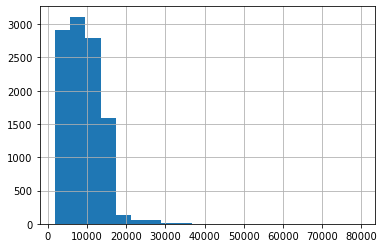

In [92]:
big_df["Price"].hist(bins=20);

In [93]:
big_df["Price"].fillna(big_df["Price"].median(), inplace=True)

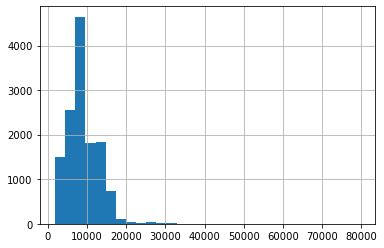

In [95]:
big_df["Price"].hist(bins=30);

In [96]:
big_df["Route_1"].fillna("None", inplace=True)
big_df["Route_2"].fillna("None", inplace=True)
big_df["Route_3"].fillna("None", inplace=True)
big_df["Route_4"].fillna("None", inplace=True)
big_df["Route_5"].fillna("None", inplace=True)

In [97]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [99]:
big_df.drop(["Route", "Duration"], axis=1, inplace=True)

In [101]:
big_df.dtypes

Airline              object
Source               object
Destination          object
Additional_Info      object
Price               float64
Date                  int32
Month                 int32
Year                  int32
Stops                 int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
Route_1              object
Route_2              object
Route_3              object
Route_4              object
Route_5              object
dtype: object

In [102]:
big_df.isna().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stops               0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
big_df["Airline"] = encoder.fit_transform(big_df["Airline"])
big_df["Airline"]

0       3
1       1
2       4
3       3
4       3
       ..
2666    1
2667    3
2668    4
2669    1
2670    6
Name: Airline, Length: 13354, dtype: int32

In [105]:
big_df["Source"] = encoder.fit_transform(big_df["Source"])
big_df["Destination"] = encoder.fit_transform(big_df["Destination"])
big_df["Additional_Info"] = encoder.fit_transform(big_df["Additional_Info"])
big_df["Route_1"] = encoder.fit_transform(big_df["Route_1"])
big_df["Route_2"] = encoder.fit_transform(big_df["Route_2"])
big_df["Route_3"] = encoder.fit_transform(big_df["Route_3"])
big_df["Route_4"] = encoder.fit_transform(big_df["Route_4"])
big_df["Route_5"] = encoder.fit_transform(big_df["Route_5"])

In [106]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,30,13,5
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,5
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,5
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,13,5
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,13,5


In [107]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  int32  
 1   Source            13354 non-null  int32  
 2   Destination       13354 non-null  int32  
 3   Additional_Info   13354 non-null  int32  
 4   Price             13354 non-null  float64
 5   Date              13354 non-null  int32  
 6   Month             13354 non-null  int32  
 7   Year              13354 non-null  int32  
 8   Stops             13354 non-null  int32  
 9   Arrival_Hour      13354 non-null  int32  
 10  Arrival_Minute    13354 non-null  int32  
 11  Departure_Hour    13354 non-null  int32  
 12  Departure_Minute  13354 non-null  int32  
 13  Route_1           13354 non-null  int32  
 14  Route_2           13354 non-null  int32  
 15  Route_3           13354 non-null  int32  
 16  Route_4           13354 non-null  int32  

# Feature Selection